# Taller Time Series

Realizado por: Sara Peña

In [15]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------------------- ------ 8.1/9.8 MB 42.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 41.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa import tsatools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
from scipy import stats



## Preguntas

2. Cargar el df asignar indice de la variable tiempo

In [10]:
# Cargar la secuencia de datos
desempleo_df = pd.read_csv('./desempleo_colombia_total_nacional.csv')


#Asignar el indice de la variable tiempo (date)
desempleo_df['fecha'] = pd.to_datetime(desempleo_df['fecha'], format='%d/%m/%Y')
desempleo_ts = pd.Series(desempleo_df['tasa_desempleo_total_nacional'].values, index=desempleo_df['fecha'], name='Desempleo')




3. Gráfica Respecto al tiempo

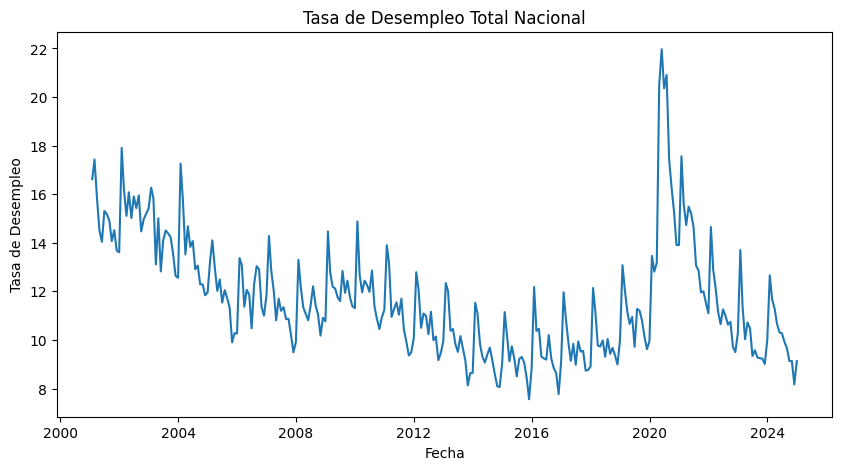

In [11]:
#Graficar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(desempleo_ts)
plt.title('Tasa de Desempleo Total Nacional')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.show()


4. Gráfica de comparación de estacionalidad de los años 2021, 2022, 2023, 2024

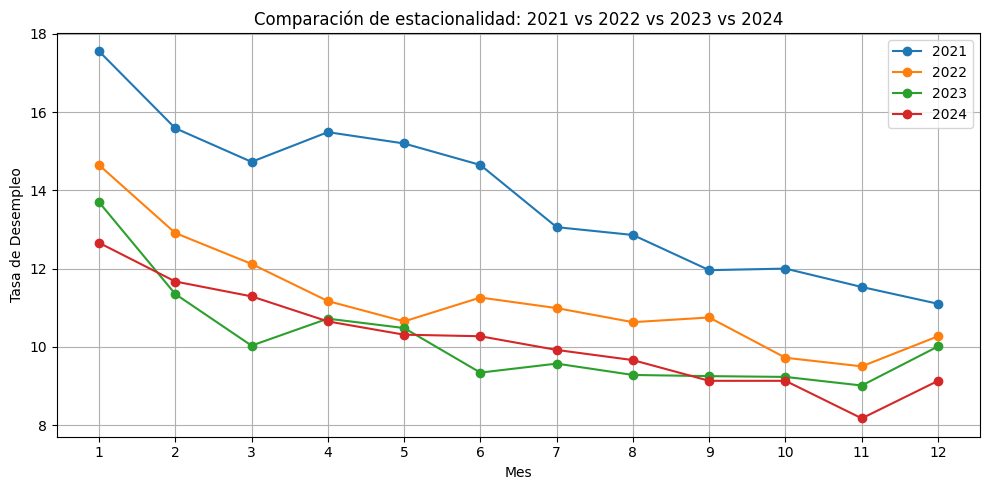

In [13]:
#Grafica comparación de estaciones
# Extraer año y mes como columnas separadas
desempleo_df['año'] = desempleo_df['fecha'].dt.year
desempleo_df['mes'] = desempleo_df['fecha'].dt.month

# Crear figura
plt.figure(figsize=(10, 5))

# Seleccionar los años que quieras comparar (ajusta según tus datos)
anios_a_comparar = [2021, 2022, 2023, 2024]

# Graficar cada año como una serie mensual
for año in anios_a_comparar:
    datos_anio = desempleo_df[desempleo_df['año'] == año]
    plt.plot(
        datos_anio['mes'],
        datos_anio['tasa_desempleo_total_nacional'],
        marker='o',
        label=str(año)
    )

# Personalización del gráfico
plt.title('Comparación de estacionalidad: 2021 vs 2022 vs 2023 vs 2024')
plt.xlabel('Mes')
plt.ylabel('Tasa de Desempleo')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5. Documentación tstools

a. ¿Qué significa párametro ctt?

b. ¿cómo funciona el objeto formula de la función ols?

c. ¿cuál es el significado del operador tilde (~) en la fórmula? 

a. En la función add_trend del módulo tsatolls de statsmodels, el parámtro 'ctt' es un valor posible del argumento 'trend', el cual se utiliza para agregar componentes de tendencia a una serie de datos. Especificamente, 'ctt' indica que se deben añadir tres elementos: una constante (intercepto), una tendencia lineal y una tendencia cuadratica. 
Esto permite modelar series de tiempo con comportamiento más complejos, sirve para capturar cambios constantes como la aceleración o curvaturas en la evolución temporal de los datos. 

b. En statsmodels.formula.api.ols, la formula es una cadena de texto que especifica el modelo de regresión usando la notación de estilo R

In [20]:
#Ejemplo punto b
from statsmodels.formula.api import ols

#Dataframe de ejemplo

datos = pd.DataFrame({
    'x': [1, 2, 3, 4, 5], 
    'y': [2, 3, 5, 7, 11]})

# Crear un modelo de regresión lineal 
model = ols('y ~ x', data=datos).fit()

# Ver el resumen de los resultados
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     51.86
Date:                Sat, 31 May 2025   Prob (F-statistic):            0.00552
Time:                        09:55:53   Log-Likelihood:                -5.6451
No. Observations:                   5   AIC:                             15.29
Df Residuals:                       3   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000      1.013     -0.987      0.3

C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


c. El operador ~ en la formula separa la variable dependiente de las independientes. Es decir, todo lo que está a la izquierda de ~ es lo que el modelo intenta predecir (la variable objetivo), y todo lo que está a la derecha son las variables que se usan para hacer la predicción.

In [21]:
#Ejemplo punto c
#Dataframe de ejemplo
datos = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5],
    'x2': [2, 1, 4, 3, 5],
    'y':[2, 3, 6, 8, 10] 
})

# Crear un modelo de regresión lineal múltiple
model = ols('y ~ x1 + x2', data=datos).fit()

# Ver el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sat, 31 May 2025   Prob (F-statistic):            0.00670
Time:                        09:59:59   Log-Likelihood:              -0.061166
No. Observations:                   5   AIC:                             6.122
Df Residuals:                       2   BIC:                             4.951
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7000      0.424     -1.650      0.2

C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


6. Crear un modelo API de formula y gráficar la tendencia

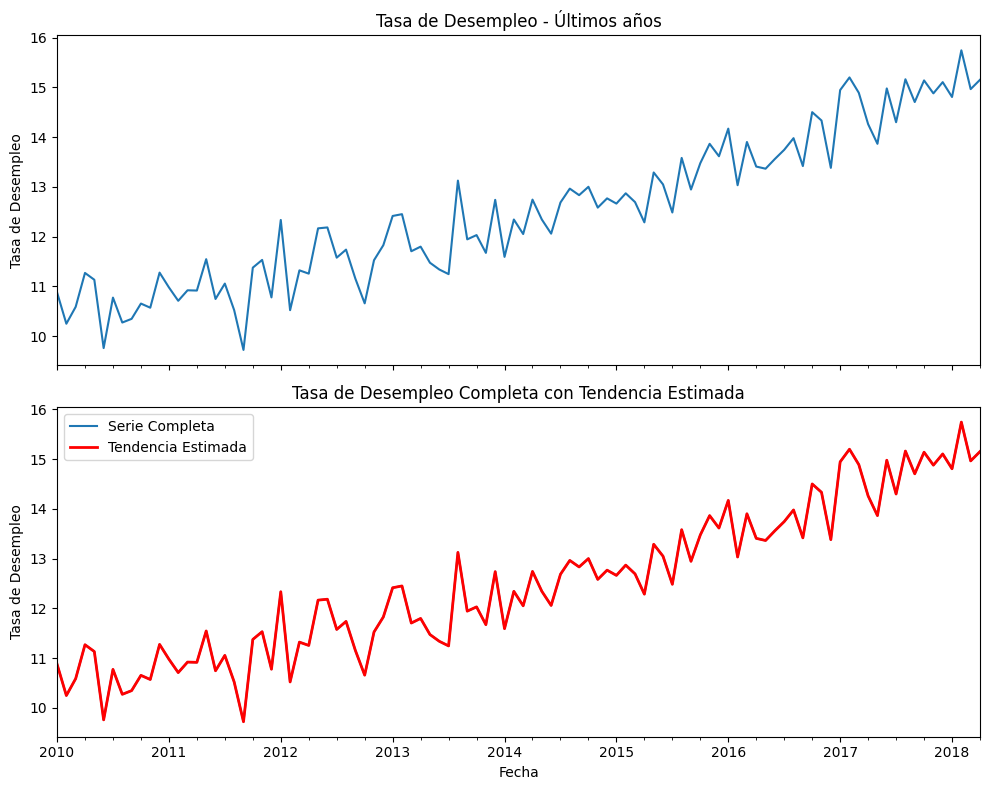

In [ ]:
# 1. Agregar matriz de diseño con tendencia cuadrática (constante + tiempo + tiempo^2)
X_trend = tsatools.add_trend(desempleo_df['tasa_desempleo_total_nacional'], trend='ctt')

# 2. Ajustar modelo OLS
modelo = sm.OLS(desempleo_df['tasa_desempleo_total_nacional'], X_trend).fit()

# 3. Agregar tendencia estimada al DataFrame
desempleo_df['tendencia_estimada'] = modelo.fittedvalues

# 4. Definir subconjunto para el primer gráfico 
four_years_df = desempleo_df.copy()

# 5. Crear figura con dos subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Primer gráfico: últimos 4 años (o toda la serie)
four_years_df['tasa_desempleo_total_nacional'].plot(ax=axes[0], title='Tasa de Desempleo - Últimos años')
axes[0].set_ylabel('Tasa de Desempleo')

# Segundo gráfico: serie completa + tendencia estimada
desempleo_df['tasa_desempleo_total_nacional'].plot(ax=axes[1], label='Serie Completa')
desempleo_df['tendencia_estimada'].plot(ax=axes[1], color='red', label='Tendencia Estimada', linewidth=2)
axes[1].set_ylabel('Tasa de Desempleo')
axes[1].set_title('Tasa de Desempleo Completa con Tendencia Estimada')
axes[1].legend()

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

7. Calcular la estacionalidad

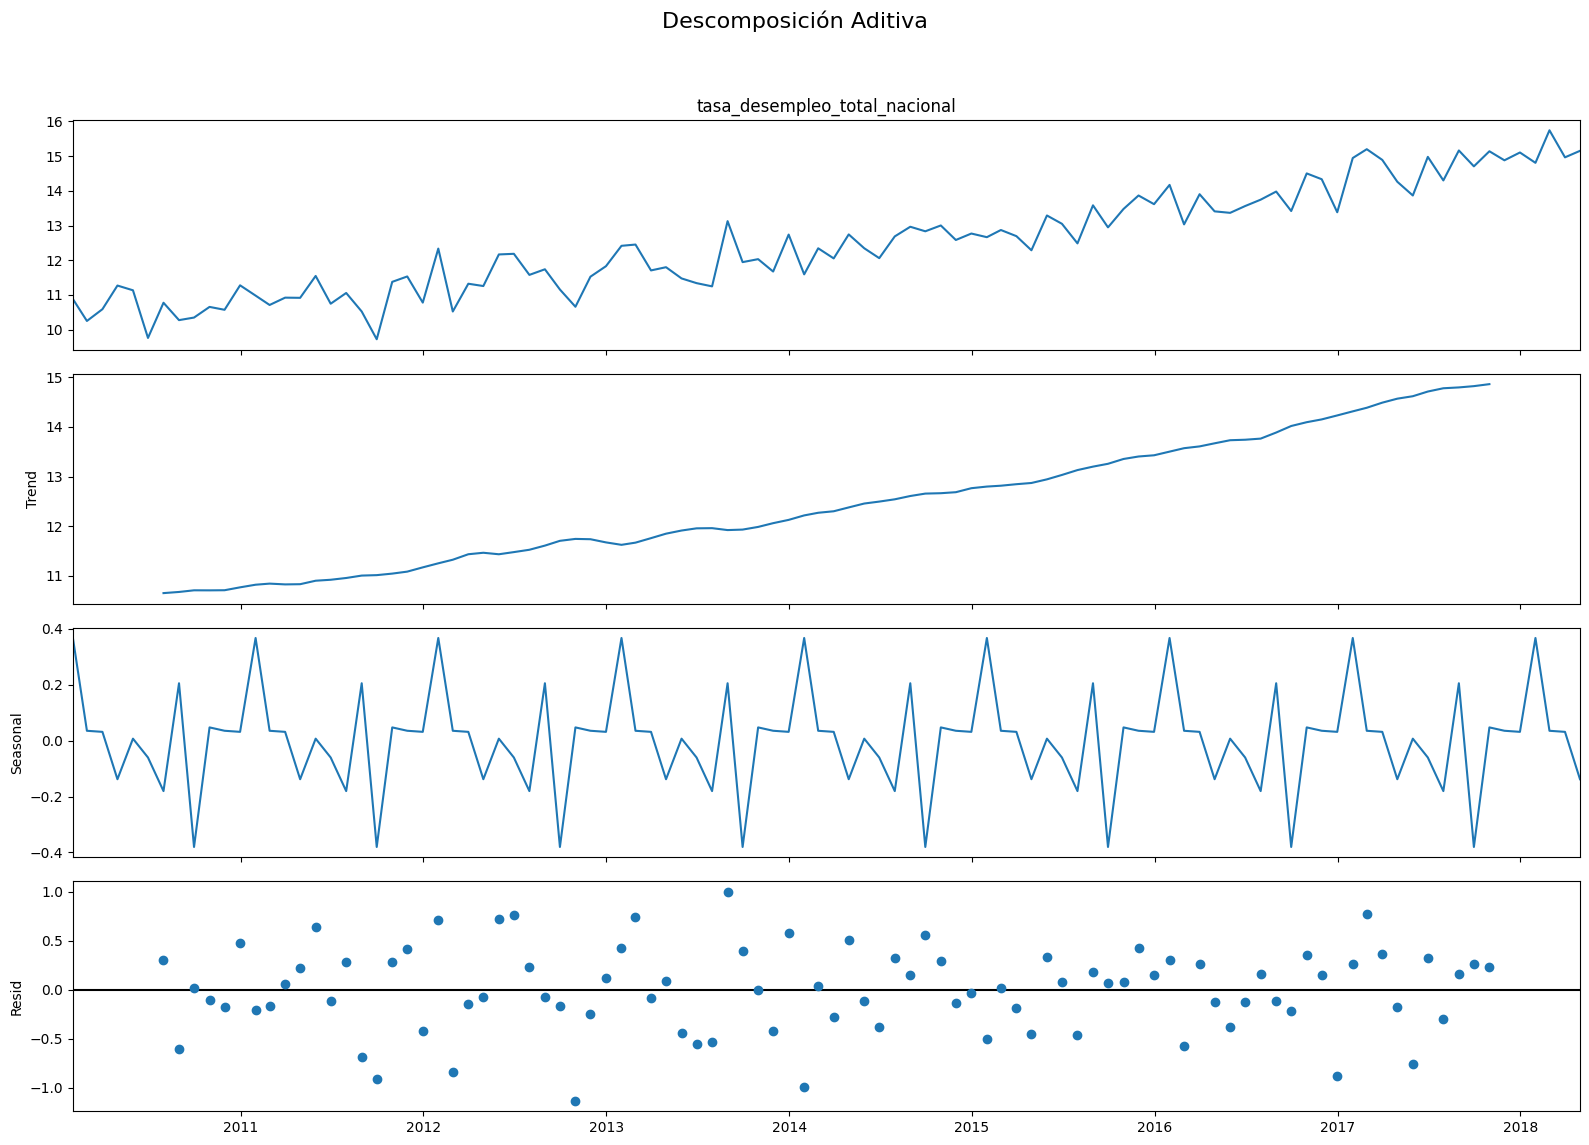

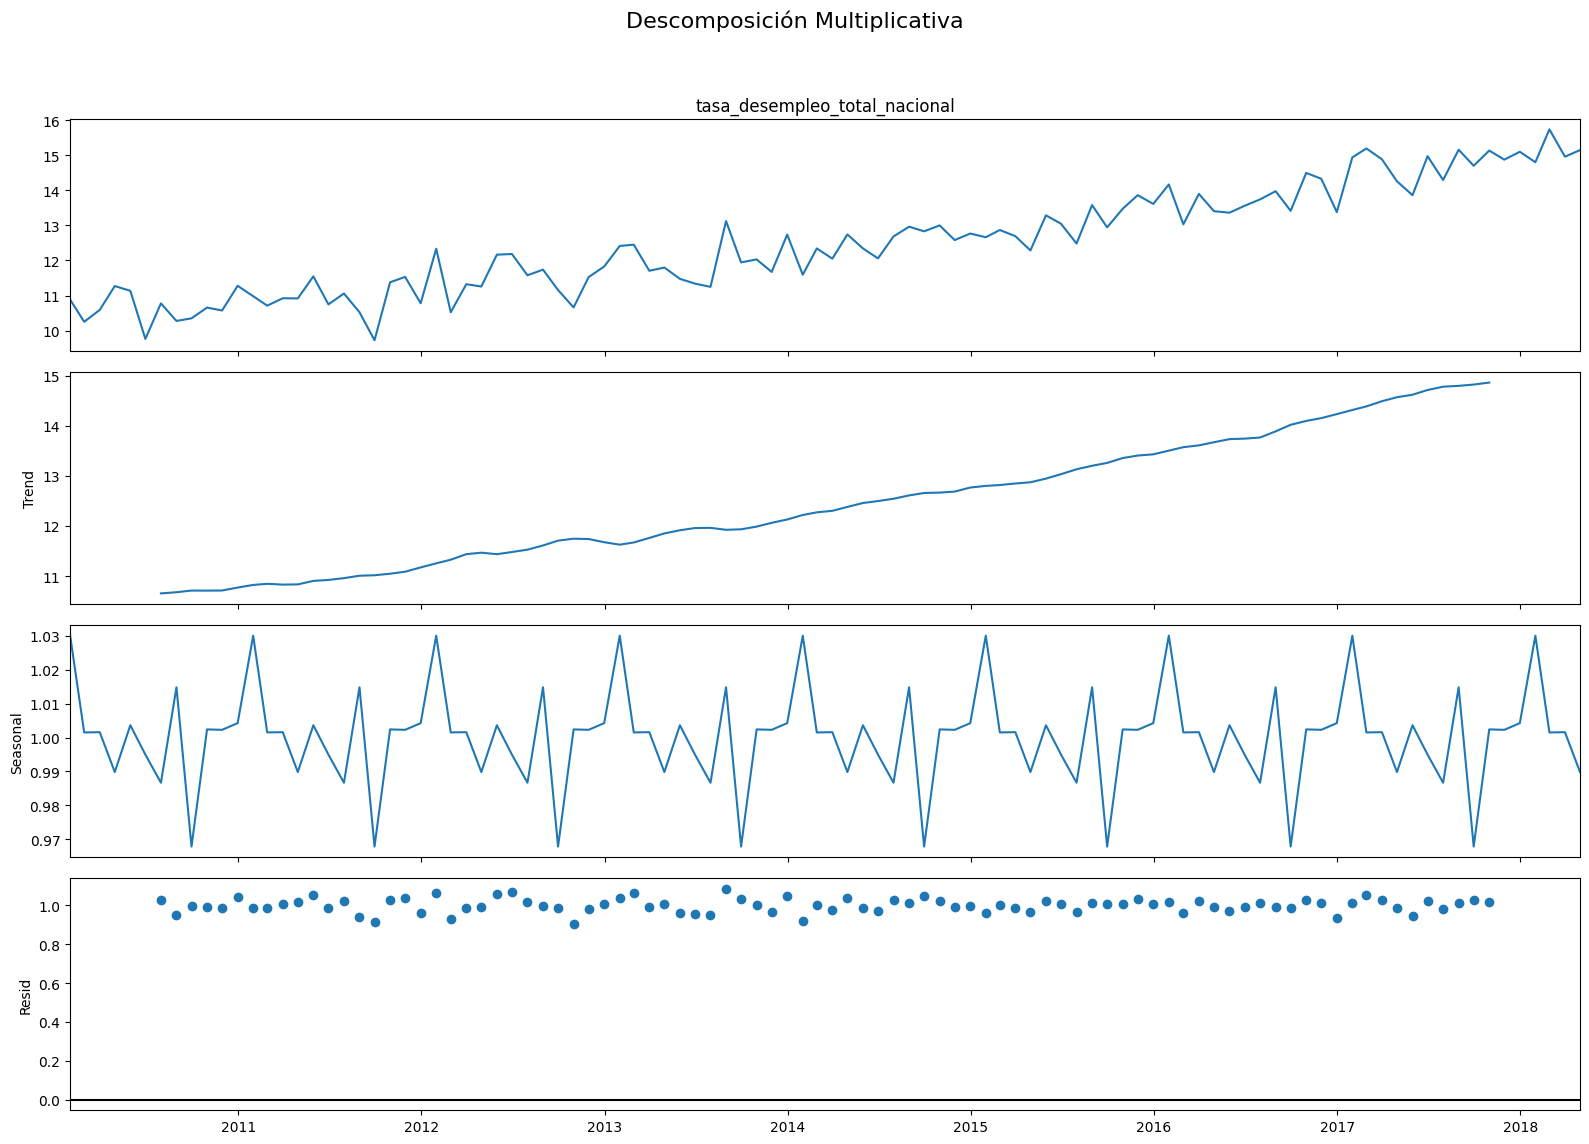

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Serie como objeto Series
desempleo_ts = desempleo_df['tasa_desempleo_total_nacional']

# Descomposición estacional
additive_decomposition = seasonal_decompose(desempleo_ts, model='additive', period=12)
multiplicative_decomposition = seasonal_decompose(desempleo_ts, model='multiplicative', period=12)

# Gráficas
plt.rcParams.update({'figure.figsize': (16, 12)})

additive_decomposition.plot().suptitle('Descomposición Aditiva', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

multiplicative_decomposition.plot().suptitle('Descomposición Multiplicativa', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### 8. ¿cuáles son las diferencias entre la descomposición aditiva y la multiplicativa y cómo afecta el tipo de descomposición en la interpretación de su serie de datos? 

La principal diferencia entre la descomposición aditiva y multiplicativa radica en cómo se combinan los componentes de la serie temporal. En el modelo aditivo los componentes se suman (Y = Tendencia + Estacional + Residual), en el multiplicativo se multiplican (Y = Tendencia × Estacional × Residual). 
Esta diferencia fundamental tiene importantes implicaciones para la interpretación de la serie de desempleo. En la descomposición aditiva, la estacionalidad mantiene una amplitud constante (oscilando entre -0.4 y +0.4), lo que significa que los cambios estacionales son siempre de la misma magnitud absoluta independientemente del nivel de la serie. Por el contrario, en la descomposición multiplicativa, el componente estacional oscila alrededor de 1.0 (entre 0.97 y 1.03), representando factores que amplifican o reducen proporcionalmente la tendencia, lo que significa que cuando el desempleo es más alto, la variabilidad estacional también es mayor. 
En este caso, la descomposición multiplicativa resulta más apropiada porque los residuos son menores y más estables, y porque desde una perspectiva económica, la estacionalidad del desempleo tiende a ser proporcional al nivel base de la variable, reflejando mejor la realidad de que los efectos estacionales se intensifican cuando las tasas de desempleo son más elevadas.

### 9. Explique la razón por la cual son distintos los componentes estacionales de la descomposición aditiva de la multiplicativa. 

Los componentes estacionales difieren entre la descomposición aditiva y multiplicativa debido a las diferentes unidades de medida y escalas que cada método utiliza para representar la estacionalidad. En la descomposición aditiva, el componente estacional se expresa en las mismas unidades que la serie original, por lo que oscila entre valores como -0.4 y +0.4, indicando que ciertos meses agregan o sustraen aproximadamente 0.4 puntos porcentuales a la tendencia base. Por otro lado, la descomposición multiplicativa expresa el componente estacional como factores multiplicativos centrados alrededor de 1.0, donde valores como 0.97 significan que ese mes reduce la tendencia en un 3%, mientras que 1.03 la aumenta en un 3%. Esta diferencia en la representación surge porque la descomposición aditiva asume que los efectos estacionales son constantes en magnitud absoluta (siempre suman o restan la misma cantidad), mientras que la multiplicativa asume que son constantes en términos relativos (siempre multiplican por el mismo factor). Por tanto, aunque ambos métodos capturan el mismo patrón estacional, lo expresan en escalas completamente diferentes: uno en unidades absolutas y otro en términos de proporciones, lo que explica por qué los valores numéricos del componente estacional son tan distintos entre ambas descomposiciones.

### 10.  ¿Su serie tiene picos o valles muy prolongados como los del ejemplo? Si es así, ¿cómo se expresan estos valores atípicos en el residuo de la descomposición? 

Según los resultados obtenidos, si se observan que hay algunos picos y valles prolongados:
- Valle prolongado alrededor de 2012: donde la tasa de desempleo bajó significativamente por debajo de la tendencia general
- Pico sostenido entre 2016 y 2017: donde el desempleo se mantuvo constante por encima de los niveles esperados según la tendencia

Como se expresan estos valores atípicos en los residuos:
- Descomposición aditiva:
 - Residuos más grandes y persistentes, especialmente visibles en los picos que superan +0.4
 - Agrupaciones de residuos consecutivos del mismo signo, indicando que la descomposición no logra capturar completamente estos períodos prolongados de comportamiento anómalo 

- Descomposición multiplicativa:
 - Residuos que se alejan más de 1.0 (el valor neutro)
 - Patrones similares de agrupación, pero con menor magnitud relativa

Conclusión:
La presencia de estos residuos agrupados y persistentes (en lugar de estar distribuidos aleatoriamente alrededor de cero o uno) sugiere que la serie tiene componentes estructurales adicionales que ninguna de las dos descomposiciones estándar logra capturar completamente, posiblemente relacionados con ciclos económicos más largos o eventos macroeconómicos específicos que afectaron el mercado laboral durante esos períodos.

### 11.  Seleccione un punto en el tiempo para dividir la serie. 

El ejemplo mostrado tiene 288 puntos (periodos), se utilizó como punto de división los últimos 36 periodos, es decir 3 años. Predicción Naive simplemente mantiene el mismo valor final para los demás puntos. Cuando hay estacionalidad, se tiene simplemente el valor del periodo anterior ajustado a la estacionalidad. 

a. La primera serie, desde el inicio hasta el punto de corte es utilizada para entrenamiento. Línea azul continua en el ejemplo. 

b. La serie posterior, desde el punto de corte hasta el final, serie se utiliza para validación. Línea azul punteada en el ejemplo. 

c. Asuma que la predicción corresponde a una copia del último segmento estacional (para el ejemplo 12 periodos) predicción. Línea naranja en el ejemplo. 

Serie de datos: 2001-2024 (aproximadamente 100 puntos mensuales)
Entrenamiento: 2001-2021 (aproximadamente 64 puntos)
Validación: 2022-2024 (36 puntos)
Total de puntos en la serie: 100
Punto de división: 64
Períodos de entrenamiento: 64 (2001-2021)
Períodos de validación: 36 (2022-2024)


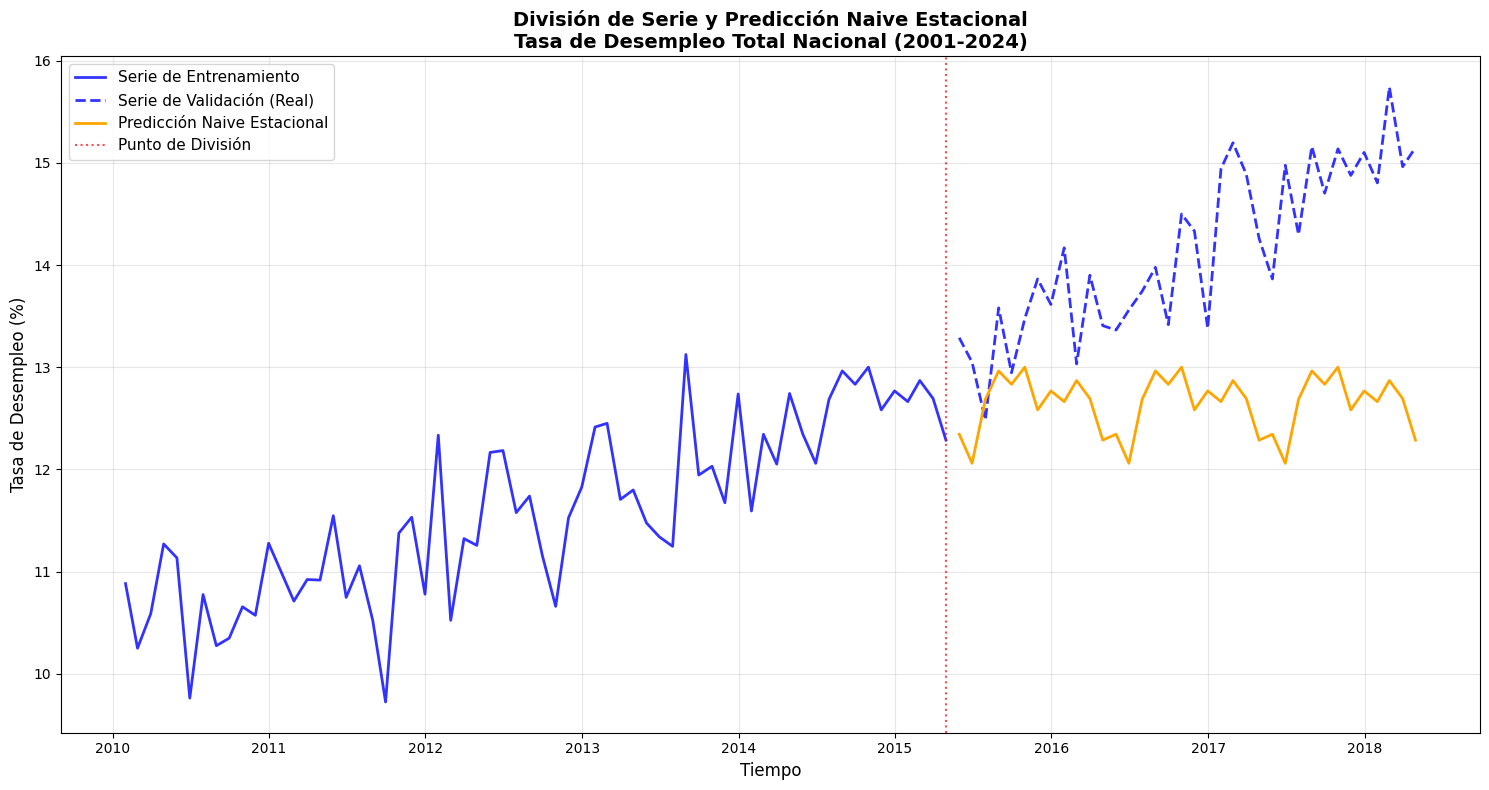

In [39]:
# Paso 1: Definir el punto de división
# Serie desde 2001 hasta 2024 (aproximadamente 276-288 puntos mensuales)
# Usaremos los últimos 36 períodos (3 años, 2022-2024) para validación
total_points = len(desempleo_ts)
validation_periods = 36  # últimos 3 años (2022-2024)
split_point = total_points - validation_periods

print(f"Serie de datos: 2001-2024 (aproximadamente {total_points} puntos mensuales)")
print(f"Entrenamiento: 2001-2021 (aproximadamente {split_point} puntos)")
print(f"Validación: 2022-2024 ({validation_periods} puntos)")

print(f"Total de puntos en la serie: {total_points}")
print(f"Punto de división: {split_point}")
print(f"Períodos de entrenamiento: {split_point} (2001-2021)")
print(f"Períodos de validación: {validation_periods} (2022-2024)")

# Paso 2: Dividir la serie
# a. Serie de entrenamiento (desde el inicio hasta el punto de corte)
train_series = desempleo_ts.iloc[:split_point]

# b. Serie de validación (desde el punto de corte hasta el final)
validation_series = desempleo_ts.iloc[split_point:]

# Paso 3: Crear predicción Naive Estacional
# c. Copiar los últimos 12 períodos (1 año de estacionalidad) y repetirlos
seasonal_period = 12
last_seasonal_cycle = train_series.iloc[-seasonal_period:].values

# Crear las predicciones repitiendo el patrón estacional
n_predictions = len(validation_series)
predictions = []

for i in range(n_predictions):
    # Usar el valor correspondiente del ciclo estacional
    seasonal_index = i % seasonal_period
    predictions.append(last_seasonal_cycle[seasonal_index])

predictions = np.array(predictions)

# Crear DataFrame para las predicciones con las mismas fechas que la validación
predictions_series = pd.Series(predictions, index=validation_series.index)

#12. Gráficar la serie de prueba
# Paso 4: Visualizar los resultados
plt.figure(figsize=(15, 8))

# Serie de entrenamiento (línea azul continua)
plt.plot(train_series.index, train_series.values, 'b-', linewidth=2, 
         label='Serie de Entrenamiento', alpha=0.8)

# Serie de validación (línea azul punteada)
plt.plot(validation_series.index, validation_series.values, 'b--', linewidth=2, 
         label='Serie de Validación (Real)', alpha=0.8)

# Predicciones (línea naranja)
plt.plot(predictions_series.index, predictions_series.values, 'orange', linewidth=2, 
         label='Predicción Naive Estacional')

# Línea vertical en el punto de división
plt.axvline(x=train_series.index[-1], color='red', linestyle=':', alpha=0.7, 
            label='Punto de División')

plt.title('División de Serie y Predicción Naive Estacional\nTasa de Desempleo Total Nacional (2001-2024)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Tasa de Desempleo (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 13. Determinar el Error

In [40]:
#Función para calcular todas las métricas de error
def calcular_metricas_error(serie_real, serie_prediccion):
    """
    Calcula múltiples métricas de error entre dos series temporales.
    
    Parámetros:
    - serie_real: Serie temporal con valores reales
    - serie_prediccion: Serie temporal con valores predichos
    
    Retorna:
    - Diccionario con todas las métricas de error
    """
    # Convertir a arrays numpy para cálculos
    real = np.array(serie_real)
    pred = np.array(serie_prediccion)
    
    # Calcular errores
    errores = real - pred
    errores_porcentuales = (errores / real) * 100
    errores_absolutos = np.abs(errores)
    errores_porcentuales_abs = np.abs(errores_porcentuales)
    
    # Métricas de error
    me = np.mean(errores)  # Mean Error (sesgo)
    mae = np.mean(errores_absolutos)  # Mean Absolute Error
    rmse = np.sqrt(np.mean(errores**2))  # Root Mean Square Error
    mpe = np.mean(errores_porcentuales)  # Mean Percentage Error
    mape = np.mean(errores_porcentuales_abs)  # Mean Absolute Percentage Error
    
    # Información adicional
    n_obs = len(real)
    
    metricas = {
        'ME': me,
        'MAE': mae,
        'RMSE': rmse,
        'MPE': mpe,
        'MAPE': mape,
        'n_observaciones': n_obs,
        'errores': errores,
        'errores_porcentuales': errores_porcentuales
    }
    
    return metricas

# a. Calcular métricas de error entre validación y predicción naive
metricas = calcular_metricas_error(validation_series, predictions)

print("\n" + "="*70)
print("MÉTRICAS DE ERROR - PREDICCIÓN NAIVE ESTACIONAL")
print("="*70)
print(f"ME  (Error Medio):                     {metricas['ME']:8.4f}")
print(f"MAE (Error Absoluto Medio):            {metricas['MAE']:8.4f}")
print(f"RMSE (Raíz Error Cuadrático Medio):   {metricas['RMSE']:8.4f}")
print(f"MPE (Error Porcentual Medio):         {metricas['MPE']:8.2f}%")
print(f"MAPE (Error Porcentual Abs. Medio):   {metricas['MAPE']:8.2f}%")
print(f"Número de observaciones:              {metricas['n_observaciones']:8d}")

# b. Análisis detallado de las medidas de error
print("\n" + "="*70)
print("ANÁLISIS DE LAS MEDIDAS DE ERROR")
print("="*70)

print(f"\n1. ERROR MEDIO (ME = {metricas['ME']:.4f}):")
if abs(metricas['ME']) < 0.1:
    sesgo = "prácticamente sin sesgo"
elif metricas['ME'] > 0:
    sesgo = "sesgo positivo (subestimación sistemática)"
else:
    sesgo = "sesgo negativo (sobreestimación sistemática)"
print(f"   • El modelo presenta {sesgo}")
print(f"   • En promedio, las predicciones difieren {abs(metricas['ME']):.4f} puntos del valor real")

print(f"\n2. ERROR ABSOLUTO MEDIO (MAE = {metricas['MAE']:.4f}):")
print(f"   • En promedio, las predicciones se desvían {metricas['MAE']:.4f} puntos porcentuales")
print(f"   • Esta es la magnitud típica del error, independiente de la dirección")

print(f"\n3. RAÍZ ERROR CUADRÁTICO MEDIO (RMSE = {metricas['RMSE']:.4f}):")
rmse_vs_mae = metricas['RMSE'] / metricas['MAE']
if rmse_vs_mae > 1.2:
    variabilidad = "alta variabilidad en los errores (algunos errores muy grandes)"
elif rmse_vs_mae > 1.1:
    variabilidad = "variabilidad moderada en los errores"
else:
    variabilidad = "errores bastante consistentes"
print(f"   • RMSE/MAE = {rmse_vs_mae:.2f}, indica {variabilidad}")
print(f"   • Penaliza más los errores grandes que el MAE")

print(f"\n4. ERROR PORCENTUAL MEDIO (MPE = {metricas['MPE']:.2f}%):")
if abs(metricas['MPE']) < 1:
    sesgo_pct = "sesgo porcentual mínimo"
elif metricas['MPE'] > 0:
    sesgo_pct = "tendencia a subestimar (predicciones menores que valores reales)"
else:
    sesgo_pct = "tendencia a sobreestimar (predicciones mayores que valores reales)"
print(f"   • El modelo presenta {sesgo_pct}")

print(f"\n5. ERROR PORCENTUAL ABSOLUTO MEDIO (MAPE = {metricas['MAPE']:.2f}%):")
if metricas['MAPE'] < 5:
    precision = "excelente precisión"
elif metricas['MAPE'] < 10:
    precision = "buena precisión"
elif metricas['MAPE'] < 20:
    precision = "precisión aceptable"
else:
    precision = "precisión limitada"
print(f"   • {precision} para predicción de series temporales")
print(f"   • Las predicciones tienen un error promedio del {metricas['MAPE']:.1f}%")

# Estadísticas adicionales de los errores
print(f"\n6. DISTRIBUCIÓN DE ERRORES:")
print(f"   • Error mínimo: {np.min(metricas['errores']):8.4f}")
print(f"   • Error máximo: {np.max(metricas['errores']):8.4f}")
print(f"   • Desv. estándar errores: {np.std(metricas['errores']):8.4f}")
print(f"   • Errores > 0 (subestimaciones): {np.sum(metricas['errores'] > 0):3d} de {len(metricas['errores'])}")
print(f"   • Errores < 0 (sobreestimaciones): {np.sum(metricas['errores'] < 0):3d} de {len(metricas['errores'])}")

# Conclusión general
print(f"\n7. CONCLUSIÓN GENERAL:")
if metricas['MAPE'] < 10 and abs(metricas['MPE']) < 2:
    conclusion = "El modelo naive estacional muestra un desempeño satisfactorio"
elif metricas['MAPE'] < 15:
    conclusion = "El modelo naive estacional tiene un desempeño moderado"
else:
    conclusion = "El modelo naive estacional presenta limitaciones significativas"
print(f"   • {conclusion}")
print(f"   • Podría servir como línea base para comparar modelos más sofisticados")

# Mostrar algunos valores específicos
print("\n" + "="*50)
print("COMPARACIÓN DE VALORES")
print("="*50)
print("Fecha\t\tReal\tPredicción\tError")
print("-" * 45)
for i in range(min(12, len(validation_series))):  # Mostrar primeros 12 meses
    date = validation_series.index[i]
    real = validation_series.iloc[i]
    pred = predictions[i]
    error = real - pred
    print(f"{date}\t{real:.2f}\t{pred:.2f}\t\t{error:.2f}")

# Paso 6: Análisis del patrón estacional usado
print(f"\n" + "="*60)
print("PATRÓN ESTACIONAL UTILIZADO (últimos 12 meses de 2021)")
print("="*60)
print("Mes\tValor")
print("-" * 15)
for i, value in enumerate(last_seasonal_cycle):
    month = i + 1
    print(f"{month:2d}\t{value:.2f}")


MÉTRICAS DE ERROR - PREDICCIÓN NAIVE ESTACIONAL
ME  (Error Medio):                       1.4976
MAE (Error Absoluto Medio):              1.5087
RMSE (Raíz Error Cuadrático Medio):     1.6991
MPE (Error Porcentual Medio):            10.32%
MAPE (Error Porcentual Abs. Medio):      10.41%
Número de observaciones:                    36

ANÁLISIS DE LAS MEDIDAS DE ERROR

1. ERROR MEDIO (ME = 1.4976):
   • El modelo presenta sesgo positivo (subestimación sistemática)
   • En promedio, las predicciones difieren 1.4976 puntos del valor real

2. ERROR ABSOLUTO MEDIO (MAE = 1.5087):
   • En promedio, las predicciones se desvían 1.5087 puntos porcentuales
   • Esta es la magnitud típica del error, independiente de la dirección

3. RAÍZ ERROR CUADRÁTICO MEDIO (RMSE = 1.6991):
   • RMSE/MAE = 1.13, indica variabilidad moderada en los errores
   • Penaliza más los errores grandes que el MAE

4. ERROR PORCENTUAL MEDIO (MPE = 10.32%):
   • El modelo presenta tendencia a subestimar (predicciones menor

### 14. Aplique un modelo de regresión lineal para capturar la tendencia y estacionalidad

MODELO DE REGRESIÓN LINEAL PARA TENDENCIA Y ESTACIONALIDAD
Verificando tipos de datos:
X dtypes:
tendencia               float64
tendencia_cuadratica    float64
Mes_1                   float64
Mes_2                   float64
Mes_3                   float64
Mes_4                   float64
Mes_5                   float64
Mes_6                   float64
Mes_7                   float64
Mes_8                   float64
Mes_9                   float64
Mes_10                  float64
Mes_11                  float64
dtype: object
y dtype: float64
Forma de X: (100, 13)
Forma de y: (100,)
X_sm dtypes después de add_constant:
const                   float64
tendencia               float64
tendencia_cuadratica    float64
Mes_1                   float64
Mes_2                   float64
Mes_3                   float64
Mes_4                   float64
Mes_5                   float64
Mes_6                   float64
Mes_7                   float64
Mes_8                   float64
Mes_9                   fl

C:\Users\sarap\AppData\Local\Temp\ipykernel_41872\1586892034.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = pd.Series(y).fillna(method='ffill').fillna(method='bfill').values


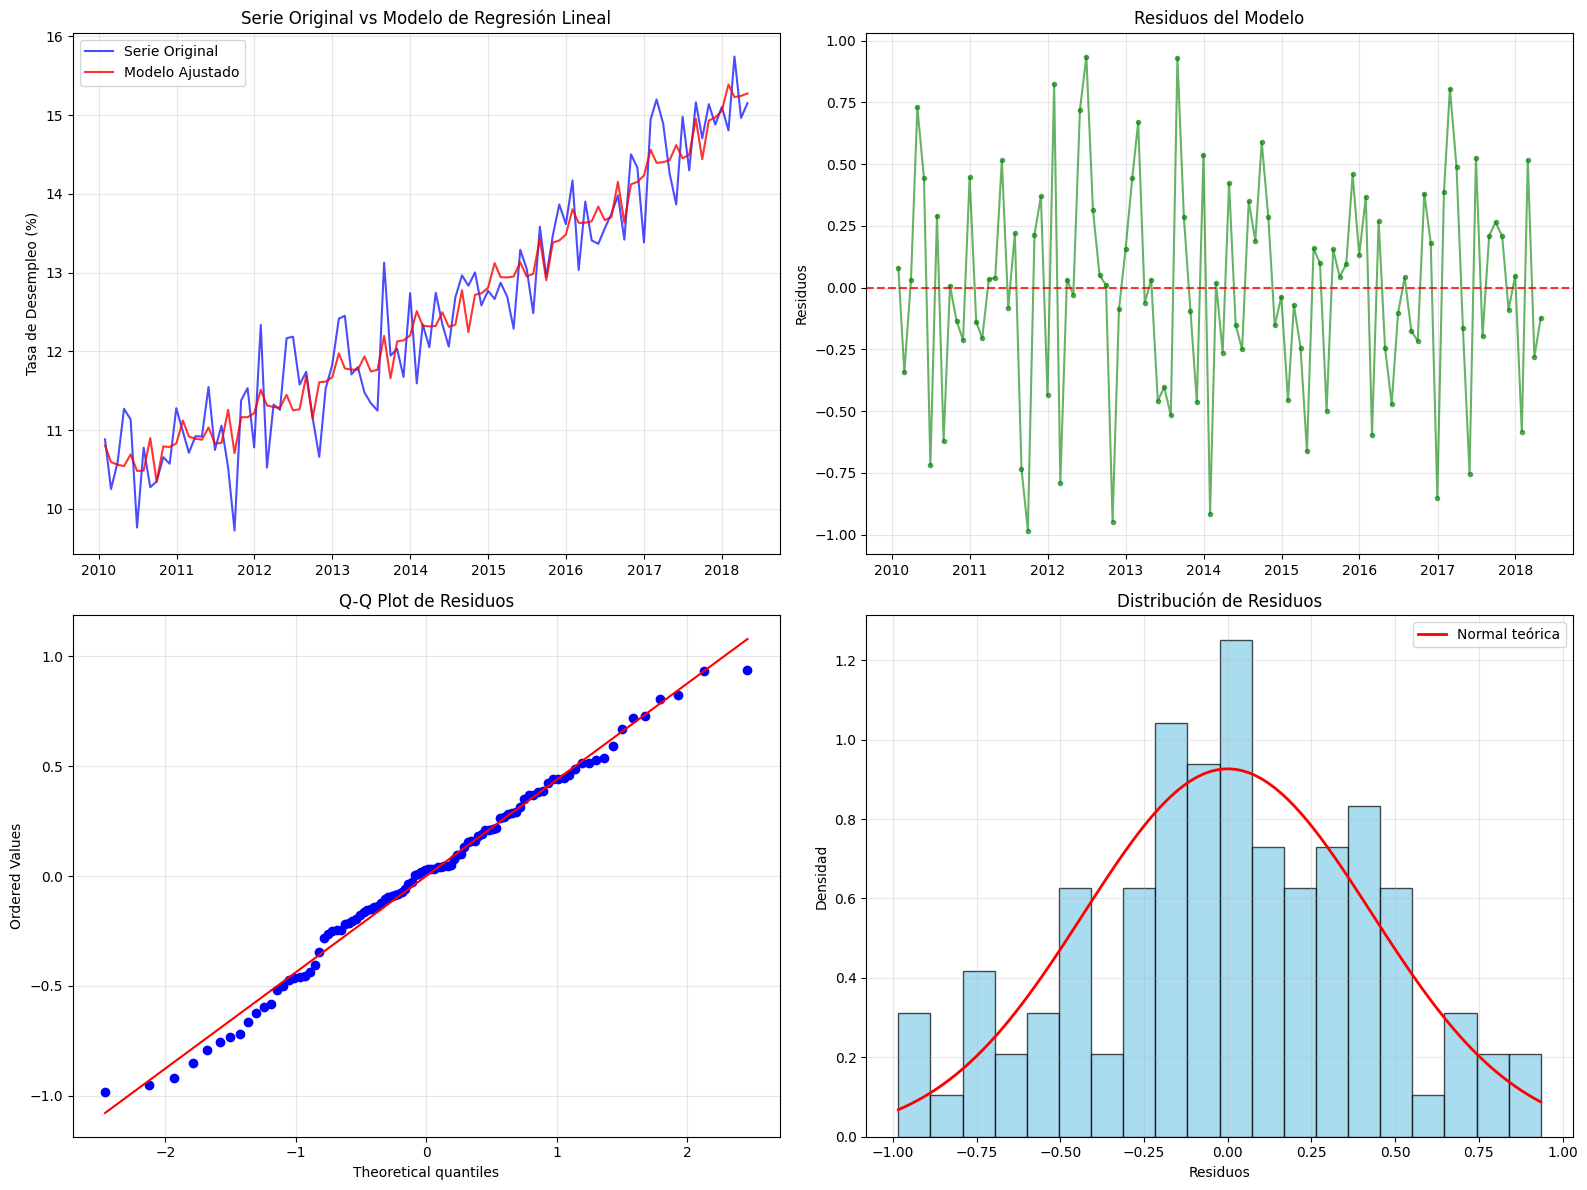

In [51]:
def modelo_regresion_lineal(serie_temporal):
    """
    Crea un modelo de regresión lineal para capturar tendencia y estacionalidad.
    
    Parámetros:
    - serie_temporal: Serie temporal de desempleo
    
    Retorna:
    - Modelo ajustado, predicciones, y métricas
    """
    
    # Paso 1: Preparar las variables explicativas
    n = len(serie_temporal)
    
    # Variable de tendencia (tiempo lineal)
    tendencia = np.arange(1, n + 1)
    
    # Variables estacionales (dummies para cada mes)
    # Crear una matriz de variables dummy para los meses (excluyendo diciembre como referencia)
    meses_serie = pd.Series(serie_temporal.index.month, index=serie_temporal.index)
    meses = pd.get_dummies(meses_serie, prefix='Mes')
    
    # Eliminar diciembre como categoría de referencia
    if 'Mes_12' in meses.columns:
        meses = meses.drop('Mes_12', axis=1)
    
    # Crear matriz de características X - IMPORTANTE: asegurar que todo sea numérico
    X = pd.DataFrame({
        'tendencia': tendencia.astype(float),
        'tendencia_cuadratica': (tendencia**2).astype(float)  # Término cuadrático
    }, index=serie_temporal.index)
    
    # Agregar variables estacionales - convertir a float explícitamente
    for col in meses.columns:
        X[col] = meses[col].astype(float)
    
    # Variable dependiente
    y = serie_temporal.values.astype(float)
    
    # Verificar que no hay valores NaN o infinitos
    X = X.fillna(0)
    y = pd.Series(y).fillna(method='ffill').fillna(method='bfill').values
    
    return X, y

def ajustar_modelo_completo(X, y, serie_temporal):
    """
    Ajusta el modelo de regresión y proporciona análisis completo.
    """
    
    # Verificar tipos de datos antes del ajuste
    print("Verificando tipos de datos:")
    print(f"X dtypes:\n{X.dtypes}")
    print(f"y dtype: {y.dtype}")
    print(f"Forma de X: {X.shape}")
    print(f"Forma de y: {y.shape}")
    
    # Asegurar que X sea completamente numérico
    X_numeric = X.select_dtypes(include=[np.number])
    if X_numeric.shape[1] != X.shape[1]:
        print("¡Advertencia! Algunas columnas no son numéricas. Convirtiendo...")
        for col in X.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
    
    # Modelo con sklearn para predicciones
    modelo_sklearn = LinearRegression()
    modelo_sklearn.fit(X, y)
    y_pred_sklearn = modelo_sklearn.predict(X)
    
    # Modelo con statsmodels para análisis estadístico detallado
    try:
        X_sm = sm.add_constant(X)  # Agregar intercepto
        # Verificar que X_sm sea completamente numérico
        print(f"X_sm dtypes después de add_constant:\n{X_sm.dtypes}")
        
        modelo_sm = sm.OLS(y, X_sm).fit()
        
    except Exception as e:
        print(f"Error al ajustar modelo statsmodels: {e}")
        print("Intentando conversión adicional...")
        
        # Conversión más agresiva
        X_clean = pd.DataFrame(X, dtype=float)
        X_sm = sm.add_constant(X_clean, prepend=False)
        y_clean = np.array(y, dtype=float)
        
        modelo_sm = sm.OLS(y_clean, X_sm).fit()
    
    return modelo_sklearn, modelo_sm, y_pred_sklearn

# Aplicar el modelo a tu serie de desempleo
print("="*80)
print("MODELO DE REGRESIÓN LINEAL PARA TENDENCIA Y ESTACIONALIDAD")
print("="*80)

# Crear variables y ajustar modelo
X, y = modelo_regresion_lineal(desempleo_ts)
modelo_sklearn, modelo_sm, y_pred = ajustar_modelo_completo(X, y, desempleo_ts)

# Paso 2: Resultados del modelo
print("\n1. RESUMEN DEL MODELO:")
print("-" * 40)
print(f"Número de observaciones: {len(y)}")
print(f"Número de variables explicativas: {X.shape[1]}")
print(f"R-cuadrado: {modelo_sm.rsquared:.4f}")
print(f"R-cuadrado ajustado: {modelo_sm.rsquared_adj:.4f}")
print(f"F-estadístico: {modelo_sm.fvalue:.2f}")
print(f"Prob(F-estadístico): {modelo_sm.f_pvalue:.6f}")

# Paso 3: Coeficientes del modelo
print("\n2. COEFICIENTES DEL MODELO:")
print("-" * 50)
print("Variable\t\tCoeficiente\tP-valor\t\tSignificativo")
print("-" * 65)

coeficientes = modelo_sm.params
p_valores = modelo_sm.pvalues

for i, (var, coef) in enumerate(coeficientes.items()):
    p_val = p_valores.iloc[i]
    significativo = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"{var:<20}\t{coef:8.4f}\t{p_val:8.6f}\t{significativo}")

# Paso 4: Interpretación de coeficientes clave
print("\n3. INTERPRETACIÓN DE COEFICIENTES PRINCIPALES:")
print("-" * 55)

tendencia_coef = coeficientes['tendencia']
if 'tendencia_cuadratica' in coeficientes:
    tendencia_cuad = coeficientes['tendencia_cuadratica']
    print(f"• Tendencia lineal: {tendencia_coef:.6f} puntos porcentuales por período")
    print(f"• Tendencia cuadrática: {tendencia_cuad:.8f} (aceleración/desaceleración)")

# Efectos estacionales
print(f"\n• EFECTOS ESTACIONALES (respecto a Diciembre como referencia):")
efectos_estacionales = {}
for var in coeficientes.index:
    if var.startswith('Mes_'):
        mes_num = int(var.split('_')[1])
        mes_nombre = pd.Timestamp(f'2020-{mes_num:02d}-01').strftime('%B')
        efectos_estacionales[mes_num] = (mes_nombre, coeficientes[var])
        significativo = "***" if p_valores[var] < 0.001 else "**" if p_valores[var] < 0.01 else "*" if p_valores[var] < 0.05 else ""
        print(f"  {mes_nombre:<12}: {coeficientes[var]:+7.4f} puntos porcentuales {significativo}")

# Paso 5: Métricas de bondad de ajuste
residuos = y - y_pred
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuos))

print(f"\n4. MÉTRICAS DE BONDAD DE AJUSTE:")
print("-" * 40)
print(f"MSE (Error Cuadrático Medio): {mse:.6f}")
print(f"RMSE (Raíz ECM): {rmse:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"Desviación estándar residuos: {np.std(residuos):.4f}")

# Paso 6: Diagnósticos del modelo
print(f"\n5. DIAGNÓSTICOS DEL MODELO:")
print("-" * 35)

# Test de Durbin-Watson para autocorrelación
dw_stat = durbin_watson(residuos)
print(f"Durbin-Watson: {dw_stat:.4f}")
if dw_stat < 1.5:
    dw_interp = "(Posible autocorrelación positiva)"
elif dw_stat > 2.5:
    dw_interp = "(Posible autocorrelación negativa)"
else:
    dw_interp = "(No hay evidencia fuerte de autocorrelación)"
print(f"  Interpretación: {dw_interp}")

# Normalidad de residuos (Jarque-Bera)
try:
    # Intentar usar el método jarque_bera si está disponible
    jb_stat = modelo_sm.jarque_bera[0]
    jb_pvalue = modelo_sm.jarque_bera[1]
except (AttributeError, IndexError):
    # Calcular manualmente el test de Jarque-Bera
    from scipy import stats
    jb_stat, jb_pvalue = stats.jarque_bera(residuos)

print(f"Jarque-Bera (normalidad): {jb_stat:.4f} (p-valor: {jb_pvalue:.6f})")
normalidad = "Residuos normales" if jb_pvalue > 0.05 else "Residuos NO normales"
print(f"  Interpretación: {normalidad}")

# Paso 7: Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Serie original vs ajustada
axes[0,0].plot(desempleo_ts.index, y, 'b-', label='Serie Original', alpha=0.7)
axes[0,0].plot(desempleo_ts.index, y_pred, 'r-', label='Modelo Ajustado', alpha=0.8)
axes[0,0].set_title('Serie Original vs Modelo de Regresión Lineal')
axes[0,0].set_ylabel('Tasa de Desempleo (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Residuos vs tiempo
axes[0,1].plot(desempleo_ts.index, residuos, 'go-', alpha=0.6, markersize=3)
axes[0,1].axhline(y=0, color='r', linestyle='--', alpha=0.8)
axes[0,1].set_title('Residuos del Modelo')
axes[0,1].set_ylabel('Residuos')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Q-Q plot de residuos
from scipy import stats
stats.probplot(residuos, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot de Residuos')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Histograma de residuos
axes[1,1].hist(residuos, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].set_title('Distribución de Residuos')
axes[1,1].set_xlabel('Residuos')
axes[1,1].set_ylabel('Densidad')
axes[1,1].grid(True, alpha=0.3)

# Superponer curva normal teórica
x_norm = np.linspace(residuos.min(), residuos.max(), 100)
y_norm = stats.norm.pdf(x_norm, np.mean(residuos), np.std(residuos))
axes[1,1].plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal teórica')
axes[1,1].legend()

plt.tight_layout()
plt.show()



#### Análisis de Ventajas y Limitaciones del Modelo de Regresión Lineal para Series Temporales

#### VENTAJAS DEL MODELO

1. SIMPLICIDAD

Una de las mayores fortalezas del modelo de regresión lineal es su facilidad para entenderse. Cada coeficiente tiene un significado claro y directo: nos dice cómo cambia la tasa de desempleo cuando varía una determinada variable, manteniendo todo lo demás constante. Esto lo hace especialmente útil en contextos económicos, donde es tan importante explicar lo que sucede como predecirlo.

2. CAPACIDAD DE IDENTIFICAR DE PATRONES FUNDAMENTALES

El modelo permite capturar varios aspectos clave de la evolución del desempleo:

- Tendencia lineal: Detecta si la tasa de desempleo sube o baja en promedio con el tiempo.
- Tendencia no lineal: Mediante un término cuadrático, permite representar curvaturas en la evolución.
- Estacionalidad fija: Considera que ciertos meses (por ejemplo, enero o junio) tienen comportamientos distintos respecto a un mes base como diciembre.

Esta capacidad lo convierte en una herramienta útil para reconocer patrones repetitivos o sistemáticos a lo largo del tiempo.

3. INFERENCIA ESTADÍSTICA 

El modelo viene acompañado de herramientas estadísticas que permiten evaluar su calidad:

- Pruebas de significancia que indican qué variables realmente influyen en el desempleo.
- Intervalos de confianza para medir la incertidumbre en las estimaciones.
- El coeficiente de determinación (R²), que muestra qué tanto del comportamiento del desempleo puede explicarse con el modelo.
- Herramientas de diagnóstico que ayudan a verificar si los supuestos del modelo se cumplen.

4. EFICIENCIA COMPUTACIONAL

Otra ventaja importante es que este modelo se puede ajustar muy rápidamente, incluso con grandes cantidades de datos. Al no requerir procesos iterativos ni parámetros complejos, su implementación es sencilla y confiable.

#### LIMITACIONES DEL MODELO

1. SUPONE UNA RELACIÓN RIGIDA

El modelo asume que la relación entre las variables es lineal, lo que no siempre se ajusta a la realidad. Las economías cambian, pueden haber rupturas bruscas o comportamientos no lineales que el modelo no logra captar bien. Además, si se usa para predecir fuera del rango de los datos observados, los resultados pueden ser poco confiables.

2. DEPENDENCIA DE SUPUESTOS QUE NO SIEMPRE SE CUMPLEN

El modelo parte de varios supuestos estadísticos que no siempre se cumplen en series temporales:

- Que los errores (residuos) no estén correlacionados entre sí, algo que no es común en datos que evolucionan con el tiempo.
- Que los errores sean normales y tengan varianza constante, lo cual puede verse afectado por crisis, shocks o cambios de política.
- Que las variables explicativas sean realmente independientes del error, algo difícil de garantizar en contextos económicos con retroalimentación.

3. ESTACIONALIDAD LIMITADA

Aunque el modelo puede capturar cierta estacionalidad, lo hace de manera bastante rígida:

- Asume que los efectos estacionales son constantes año tras año.
- No tiene en cuenta que la intensidad del efecto estacional pueda depender del nivel de desempleo.
- No se adapta bien a cambios en los patrones estacionales causados por transformaciones estructurales en la economía (como la pandemia o reformas laborales).




## BONO

### 15. Modelos de Autocorrelación y ARIMA - Suavizado con Promedio Móvil

#### Modelos de Autocorrelación y ARIMA
¿Qué son los modelos ARIMA?
Los modelos ARIMA (Autoregressive Integrated Moving Average) son una herramienta estadística clave para analizar y predecir series temporales. Combinan tres componentes:

- AR (autorregresivo): usa valores pasados de la serie para hacer predicciones.
- I (integrado): aplica diferencias a los datos para volverlos estacionarios.
- MA (media móvil): corrige las predicciones usando errores pasados.

Este enfoque permite capturar patrones en el tiempo y proyectar su comportamiento futuro, siendo ampliamente usado en distintos campos como economía, meteorología o control de calidad.

Componentes del modelo ARIMA

- AR (p): predice con base en valores pasados de la serie.
- I (d): transforma los datos para eliminar tendencias o estacionalidades.
- MA (q): ajusta predicciones usando errores anteriores.

Cada componente se ajusta según la estructura temporal de los datos, definida por los parámetros p, d y q.

Autocorrelación en series temporales
La autocorrelación mide la relación entre valores actuales y pasados de una serie. Es útil para identificar patrones, ciclos o estacionalidades. Además, ayuda a definir los parámetros del modelo ARIMA y verificar que los residuos (errores) del modelo no contengan información relevante no capturada.

Metodología Box-Jenkins
Desarrollada por Box y Jenkins, esta metodología guía la construcción de modelos ARIMA en cuatro etapas:

- Identificación: analizar la autocorrelación para elegir p, d y q.
- Estimación: ajustar los parámetros del modelo.
- Diagnóstico: verificar que los residuos sean aleatorios.
- Pronóstico: proyectar valores futuros con intervalos de confianza.

Suavizado con Promedio Móvil (MA)
El promedio móvil es una técnica sencilla para suavizar series temporales y resaltar tendencias, eliminando variaciones aleatorias. Existen varias versiones:

- Media móvil simple (SMA): promedia un número fijo de observaciones.
- Media móvil ponderada (WMA): da más peso a observaciones recientes.
- Media móvil exponencial (EMA): responde más rápido a cambios recientes mediante un factor de suavizado.

Ventajas y limitaciones del suavizado MA

Ventajas:

- Fácil de aplicar e interpretar.
- Elimina el “ruido” de corto plazo.
- Ayuda a visualizar tendencias.

Limitaciones:

- Introduce desfase temporal.
- Pierde datos al inicio.
- La elección del período afecta los resultados.
- No predice por sí mismo; solo suaviza datos pasados.

Aplicaciones prácticas
Tanto ARIMA como el suavizado MA se aplican en:

- Finanzas: análisis de precios y tendencias.
- Planificación: control de inventarios o demanda.
- Meteorología: identificación de patrones climáticos.
- Industria: monitoreo de procesos productivos.

Relación entre MA y ARIMA

El componente MA de ARIMA y el suavizado por promedio móvil comparten lógica, aunque el primero forma parte de un modelo predictivo completo, y el segundo es más exploratorio. Ambos son herramientas clave en el análisis de series temporales, y su comprensión permite elegir el enfoque más adecuado según el objetivo del análisis.

C:\Users\sarap\AppData\Local\Temp\ipykernel_41872\319918748.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2020-01-01', periods=36, freq='M')


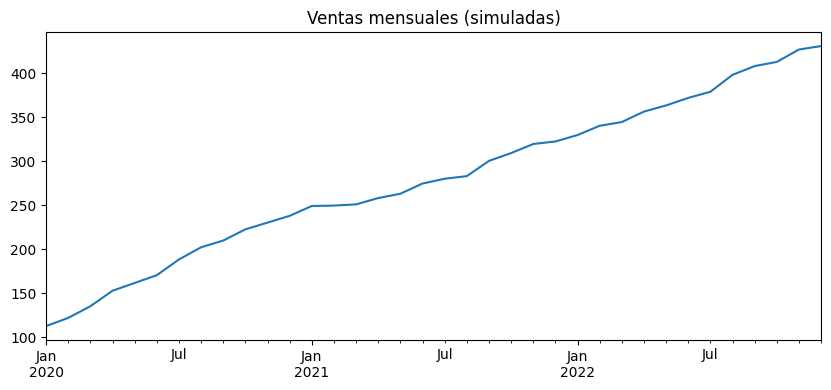

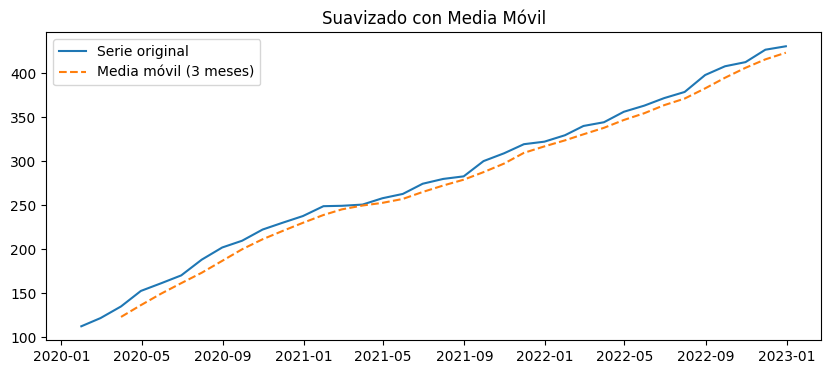

C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


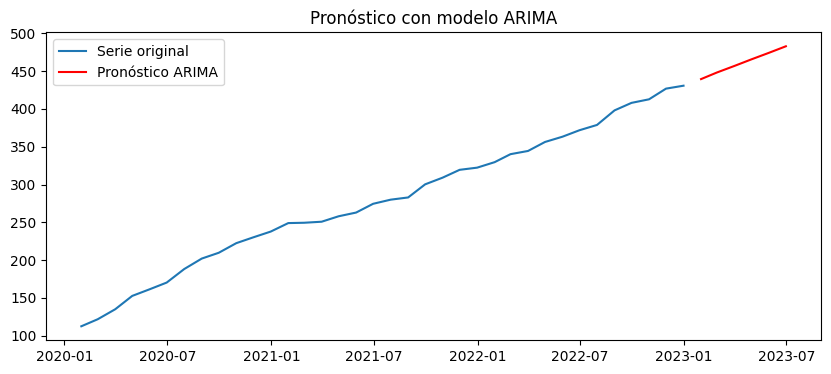

In [53]:
#Ejemplo de suavizado MA
from statsmodels.tsa.arima.model import ARIMA

# Crear una serie de datos simulada (ventas mensuales)
np.random.seed(42)
fechas = pd.date_range(start='2020-01-01', periods=36, freq='M')
ventas = np.cumsum(np.random.normal(loc=10, scale=5, size=36)) + 100
serie = pd.Series(ventas, index=fechas)

# Graficar la serie original
serie.plot(title='Ventas mensuales (simuladas)', figsize=(10, 4))
plt.show()

# Aplicar media móvil simple de 3 meses
media_movil = serie.rolling(window=3).mean()

# Graficar original vs media móvil
plt.figure(figsize=(10, 4))
plt.plot(serie, label='Serie original')
plt.plot(media_movil, label='Media móvil (3 meses)', linestyle='--')
plt.legend()
plt.title('Suavizado con Media Móvil')
plt.show()

# Ajustar modelo ARIMA simple: ARIMA(1,1,1)
modelo = ARIMA(serie, order=(1,1,1))
resultado = modelo.fit()

# Pronóstico para los próximos 6 meses
pronostico = resultado.forecast(steps=6)

# Mostrar serie + pronóstico
plt.figure(figsize=(10, 4))
plt.plot(serie, label='Serie original')
plt.plot(pronostico.index, pronostico, label='Pronóstico ARIMA', color='red')
plt.legend()
plt.title('Pronóstico con modelo ARIMA')
plt.show()



### Análisis
En este ejercicio práctico se trabajo con una serie temporal simulada que representaba ventas mensuales durante tres años, incorporando una tendencia creciente y ruido aleatorio para simular el comportamiento real de un negocio. Se aplicaron dos técnicas de análisis: primero, utilizamos una media móvil simple con ventana de tres meses para suavizar la serie y eliminar fluctuaciones aleatorias, lo cual nos permitió visualizar de forma más clara la tendencia general. Posteriormente, se implemento un modelo ARIMA(1,1,1), que permitió modelar la dinámica temporal de los datos y generar pronósticos para los seis meses siguientes. Mientras la media móvil ayudó a comprender los patrones históricos de manera más estable, ARIMA permitió hacer predicciones cuantitativas basadas en la estructura interna de la serie. Ambas técnicas son complementarias: la primera es útil para análisis exploratorio, y la segunda, para planificación y toma de decisiones futuras.

## Referencias
Noble, J. (2025, enero 29). ¿Qué son los modelos ARIMA? Ibm.com. https://www.ibm.com/es-es/think/topics/arima-model

Amaris, G., Ávila, H., & Guerrero, T. (2017). Aplicación de modelo ARIMA para el análisis de series de volúmenes anuales en el río Magdalena. Tecnura, 21(52), 88. https://doi.org/10.14483/10.14483/udistrital.jour.tecnura.2017.2.a07

IBM SPSS Modeler Subscription. (2021, agosto 17). Ibm.com. https://www.ibm.com/docs/es/spss-modeler/saas?topic=series-arima

Qué es: Metodología Box-Jenkins. (s/f). Statisticseasily.com. Recuperado el 31 de mayo de 2025, de https://es.statisticseasily.com/glosario/¿Qué-es-la-metodología-Box-Jenkins%3F/

Scott, G. (2010, abril 11). Box-Jenkins Model: Definition, uses, timeframes, and forecasting. Investopedia. https://www-investopedia-com.translate.goog/terms/b/box-jenkins-model.asp?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc


Parte I - Métodos Distintos de Suavizado. (s/f). Numxl.com. Recuperado el 31 de mayo de 2025, de https://support.numxl.com/hc/es/articles/115000144963-Parte-I-Métodos-Distintos-de-Suavizado

Canessa, R. (2024, julio 1). ¿Qué es el modelo SARIMA? Técnicas de Trading. https://www.tecnicasdetrading.com/2024/07/modelo-sarima.html

Series temporales con ARIMA I. (2020, octubre 20). Netlify.app. https://enrdados.netlify.app/post/series-temporales-con-arima-i/

Palma, R. R. (s/f). Arima Estacionalidad. Edu.ar. Recuperado el 31 de mayo de 2025, de https://themys.sid.uncu.edu.ar/rpalma/MBA/Evaluaciones%202022/Arima/Arima2.html

Evaluación De La Precisión De Los Métodos De Previsión De Series Temporales. (s/f). Fastercapital.com. Recuperado el 31 de mayo de 2025, de https://fastercapital.com/es/tema/evaluación-de-la-precisión-de-los-métodos-de-previsión-de-series-temporales.html/3

Métodos Y Técnicas Populares Para El Análisis De Series Temporales. (s/f). Fastercapital.com. Recuperado el 31 de mayo de 2025, de https://fastercapital.com/es/tema/métodos-y-técnicas-populares-para-el-análisis-de-series-temporales.html

Parra, F. (s/f). 8 Series Temporales. Bookdown.org. Recuperado el 31 de mayo de 2025, de https://bookdown.org/content/2274/series-temporales.html




